### Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,f1_score,recall_score
import datetime as dt
import seaborn as sns
from scipy import stats

### Load the dataset

In [2]:
data=pd.read_csv("Interview survey.csv",parse_dates=['Timestamp'])

In [3]:
data.head()

,Timestamp,1. Name,2. Email ID,3. Highest Education,4. Year of Passing,5. Native Place,6. Has your college placement cell provided you the information about the placement activity?,"7. Was the college providing training to the students in order to answer aptitude, coding tests and interview?",8. Communication skills,9. Analytical Reasoning,10. Logical Reasoning,11. The company you were placed,12. Where were you placed?,13.What position were you interviewed for?,14. CTC Received,Unnamed: 15
0,2020-04-06 12:47:31-05:30,Ishan,ishan123ppp@gmail.com,M.E./ M.Tech,2017,Goa,Yes,No,5,5,5,Teczuno,Bangalore,Data Analyst,2-4 LPA,11-08-1993
1,2020-04-06 13:07:25-05:30,Uday,ujeware@gmail.com,B.E./ B.Tech,2015,Ahmednagar,Yes,No,5,5,5,Sulzer,Pune,Design Engineer,> 4 LPA,25-12-1994
2,2020-04-06 13:10:11-05:30,Ajay krishna,ajaykrishnait@gmail.com,B.E./ B.Tech,2017,Salem,Yes,Yes,5,1,1,Sutherland,Chennai,Bpo,<2 LPA,21-04-1996
3,2020-04-06 13:20:18-05:30,Gaurav Praveen Bhojraj,gauravbhojraj.06@gmail.com,B.E./ B.Tech,2015,Nagpur,Yes,Yes,3,4,4,Face Academy,Pune,Business Development Executive,> 4 LPA,29-01-1994
4,2020-04-06 13:26:33-05:30,Anuj Bisht,anuj.bisht#alumni.iiserpune.ac.in,PhD.,2019,Delhi,Yes,Yes,4,4,4,TIFR-Mumbai,Mumbai,Visiting Fellow,> 4 LPA,30-08-1990


### Creating a new dataframe from existing dataframe

In [4]:
data=data.rename(columns={'1. Name':'Name','2. Email ID':'Email_ID','3. Highest Education':'Highest_Education','4. Year of Passing':'Year_Of_Passing','5. Native Place':'Native_Place','6. Has your college placement cell provided you the information about the placement activity?'
                          :'Placement_Notification','7. Was the college providing training to the students in order to answer aptitude, coding tests and interview?'
                          :'Training','8. Communication skills':'Communication_Skills','9. Analytical Reasoning':'Analytical_Reasoning','10. Logical Reasoning':'Logical_Reasoning','11. The company you were placed':'Company_placed','12. Where were you placed?'
                          :'Location','13.What position were you interviewed for?':'Position','14. CTC Received':'CTC'})
data.head()

,Timestamp,Name,Email_ID,Highest_Education,Year_Of_Passing,Native_Place,Placement_Notification,Training,Communication_Skills,Analytical_Reasoning,Logical_Reasoning,Company_placed,Location,Position,CTC,Unnamed: 15
0,2020-04-06 12:47:31-05:30,Ishan,ishan123ppp@gmail.com,M.E./ M.Tech,2017,Goa,Yes,No,5,5,5,Teczuno,Bangalore,Data Analyst,2-4 LPA,11-08-1993
1,2020-04-06 13:07:25-05:30,Uday,ujeware@gmail.com,B.E./ B.Tech,2015,Ahmednagar,Yes,No,5,5,5,Sulzer,Pune,Design Engineer,> 4 LPA,25-12-1994
2,2020-04-06 13:10:11-05:30,Ajay krishna,ajaykrishnait@gmail.com,B.E./ B.Tech,2017,Salem,Yes,Yes,5,1,1,Sutherland,Chennai,Bpo,<2 LPA,21-04-1996
3,2020-04-06 13:20:18-05:30,Gaurav Praveen Bhojraj,gauravbhojraj.06@gmail.com,B.E./ B.Tech,2015,Nagpur,Yes,Yes,3,4,4,Face Academy,Pune,Business Development Executive,> 4 LPA,29-01-1994
4,2020-04-06 13:26:33-05:30,Anuj Bisht,anuj.bisht#alumni.iiserpune.ac.in,PhD.,2019,Delhi,Yes,Yes,4,4,4,TIFR-Mumbai,Mumbai,Visiting Fellow,> 4 LPA,30-08-1990


In [5]:
data=data.drop(['Timestamp','Unnamed: 15'],axis=1)
data.head()

,Name,Email_ID,Highest_Education,Year_Of_Passing,Native_Place,Placement_Notification,Training,Communication_Skills,Analytical_Reasoning,Logical_Reasoning,Company_placed,Location,Position,CTC
0,Ishan,ishan123ppp@gmail.com,M.E./ M.Tech,2017,Goa,Yes,No,5,5,5,Teczuno,Bangalore,Data Analyst,2-4 LPA
1,Uday,ujeware@gmail.com,B.E./ B.Tech,2015,Ahmednagar,Yes,No,5,5,5,Sulzer,Pune,Design Engineer,> 4 LPA
2,Ajay krishna,ajaykrishnait@gmail.com,B.E./ B.Tech,2017,Salem,Yes,Yes,5,1,1,Sutherland,Chennai,Bpo,<2 LPA
3,Gaurav Praveen Bhojraj,gauravbhojraj.06@gmail.com,B.E./ B.Tech,2015,Nagpur,Yes,Yes,3,4,4,Face Academy,Pune,Business Development Executive,> 4 LPA
4,Anuj Bisht,anuj.bisht#alumni.iiserpune.ac.in,PhD.,2019,Delhi,Yes,Yes,4,4,4,TIFR-Mumbai,Mumbai,Visiting Fellow,> 4 LPA


In [6]:
pd.get_dummies(data.CTC)

,2-4 LPA,<2 LPA,> 4 LPA
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,1,0
8,0,0,1
9,0,0,1


In [7]:
Counter(data.CTC)

Counter({'2-4 LPA': 17, '> 4 LPA': 15, '<2 LPA': 10})

In [8]:
data.CTC.replace(['> 4 LPA'],'High Salary',inplace=True)
data.CTC.replace(['2-4 LPA','<2 LPA'],'Low Salary',inplace=True)

### Check for EDA

In [9]:
data.describe()

,Year_Of_Passing,Communication_Skills,Analytical_Reasoning,Logical_Reasoning
count,42.000000,42.000000,42.000000,42.000000
mean,2010.690476,4.142857,3.809524,3.880952
std,42.680599,0.718108,0.968733,0.916046
min,1758.000000,3.000000,1.000000,1.000000
25%,2015.000000,4.000000,3.000000,4.000000
50%,2016.000000,4.000000,4.000000,4.000000
75%,2018.000000,5.000000,4.000000,4.000000
max,2105.000000,5.000000,5.000000,5.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    42 non-null     object
 1   Email_ID                42 non-null     object
 2   Highest_Education       42 non-null     object
 3   Year_Of_Passing         42 non-null     int64 
 4   Native_Place            42 non-null     object
 5   Placement_Notification  42 non-null     object
 6   Training                42 non-null     object
 7   Communication_Skills    42 non-null     int64 
 8   Analytical_Reasoning    42 non-null     int64 
 9   Logical_Reasoning       42 non-null     int64 
 10  Company_placed          41 non-null     object
 11  Location                42 non-null     object
 12  Position                42 non-null     object
 13  CTC                     42 non-null     object
dtypes: int64(4), object(10)
memory usage: 4.7+ KB


In [11]:
data.isna().sum().to_frame().T

,Name,Email_ID,Highest_Education,Year_Of_Passing,Native_Place,Placement_Notification,Training,Communication_Skills,Analytical_Reasoning,Logical_Reasoning,Company_placed,Location,Position,CTC
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [12]:
data=data.drop(['Name'],axis=1)
data.head()

,Email_ID,Highest_Education,Year_Of_Passing,Native_Place,Placement_Notification,Training,Communication_Skills,Analytical_Reasoning,Logical_Reasoning,Company_placed,Location,Position,CTC
0,ishan123ppp@gmail.com,M.E./ M.Tech,2017,Goa,Yes,No,5,5,5,Teczuno,Bangalore,Data Analyst,Low Salary
1,ujeware@gmail.com,B.E./ B.Tech,2015,Ahmednagar,Yes,No,5,5,5,Sulzer,Pune,Design Engineer,High Salary
2,ajaykrishnait@gmail.com,B.E./ B.Tech,2017,Salem,Yes,Yes,5,1,1,Sutherland,Chennai,Bpo,Low Salary
3,gauravbhojraj.06@gmail.com,B.E./ B.Tech,2015,Nagpur,Yes,Yes,3,4,4,Face Academy,Pune,Business Development Executive,High Salary
4,anuj.bisht#alumni.iiserpune.ac.in,PhD.,2019,Delhi,Yes,Yes,4,4,4,TIFR-Mumbai,Mumbai,Visiting Fellow,High Salary


### Using Label Encoder

In [13]:
enc=LabelEncoder()
data.Email_ID=enc.fit_transform(data.Email_ID)
data.Highest_Education=enc.fit_transform(data.Highest_Education)
data.Native_Place=enc.fit_transform(data.Native_Place)
data.Placement_Notification=enc.fit_transform(data.Placement_Notification)
data.Training=enc.fit_transform(data.Training)
data.Location=enc.fit_transform(data.Location)
data.Position=enc.fit_transform(data.Position)
data.CTC=enc.fit_transform(data.CTC)

### Define X and y variables

In [14]:
X=data.loc[:,['Email_ID','Highest_Education','Year_Of_Passing','Native_Place','Placement_Notification','Training','Communication_Skills','Analytical_Reasoning','Logical_Reasoning','Location','Position']]
y=data.CTC

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Email_ID                42 non-null     int32
 1   Highest_Education       42 non-null     int32
 2   Year_Of_Passing         42 non-null     int64
 3   Native_Place            42 non-null     int32
 4   Placement_Notification  42 non-null     int32
 5   Training                42 non-null     int32
 6   Communication_Skills    42 non-null     int64
 7   Analytical_Reasoning    42 non-null     int64
 8   Logical_Reasoning       42 non-null     int64
 9   Location                42 non-null     int32
 10  Position                42 non-null     int32
dtypes: int32(7), int64(4)
memory usage: 2.6 KB


In [16]:
corr=data.corr()
corr

,Email_ID,Highest_Education,Year_Of_Passing,Native_Place,Placement_Notification,Training,Communication_Skills,Analytical_Reasoning,Logical_Reasoning,Location,Position,CTC
Email_ID,1.000000,-0.397472,0.357260,-0.028205,0.088849,0.012651,-0.060909,0.217545,0.202928,0.035560,0.138770,-0.034846
Highest_Education,-0.397472,1.000000,-0.231603,-0.111943,0.032942,-0.010051,0.238659,0.296760,0.259512,-0.018888,-0.010905,-0.284994
Year_Of_Passing,0.357260,-0.231603,1.000000,0.034824,-0.061454,-0.197519,-0.020804,-0.044524,-0.043386,0.230741,0.028054,-0.067924
Native_Place,-0.028205,-0.111943,0.034824,1.000000,-0.293453,0.059514,0.188004,-0.148056,-0.021315,0.001050,-0.069041,0.155806
Placement_Notification,0.088849,0.032942,-0.061454,-0.293453,1.000000,0.267362,0.043368,0.007144,-0.094435,-0.225313,0.017529,-0.160540
Training,0.012651,-0.010051,-0.197519,0.059514,0.267362,1.000000,-0.044106,0.074109,-0.084134,0.113301,0.138105,-0.111026
Communication_Skills,-0.060909,0.238659,-0.020804,0.188004,0.043368,-0.044106,1.000000,0.320556,0.323103,-0.185272,-0.087441,-0.060030
Analytical_Reasoning,0.217545,0.296760,-0.044524,-0.148056,0.007144,0.074109,0.320556,1.000000,0.880827,0.105535,0.126305,-0.148331
Logical_Reasoning,0.202928,0.259512,-0.043386,-0.021315,-0.094435,-0.084134,0.323103,0.880827,1.000000,0.092494,0.158976,-0.207843
Location,0.035560,-0.018888,0.230741,0.001050,-0.225313,0.113301,-0.185272,0.105535,0.092494,1.000000,0.037669,-0.304662


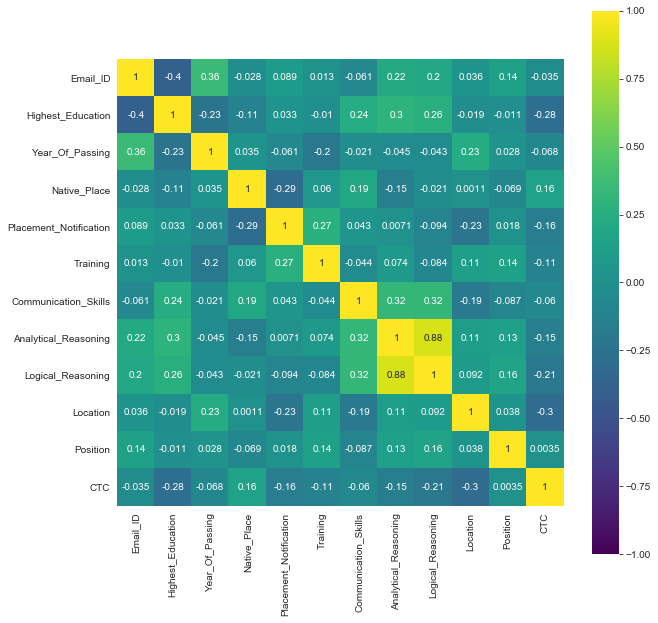

In [17]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.heatmap(corr,vmin=-1, vmax=1, center=0,fmt='.2g',annot_kws=None,linewidths=0,linecolor='white',xticklabels='auto',
    yticklabels='auto',cbar=True,cmap='viridis',square=True,annot=True)

### Using train-test split

In [18]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=10)

In [19]:
print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)

X_train shape =  (31, 11)
X_test shape =  (11, 11)
y_train shape =  (31,)
y_test shape =  (11,)


### Different Machine Learning Algorithms

### 1) XGBoost Classifier

In [20]:
from xgboost import XGBClassifier

### Define the Model

In [21]:
model=XGBClassifier(max_depth=5,learning_rate=0.001,random_state=5,n_estimators=40)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.001, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=40, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=5, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

### Predict the Model

In [22]:
y_train_predict=model.predict(X_train)
y_predict = model.predict(X_test)

print("\n Accuracy of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("\n Accuracy of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("\n Precision score: {}".format(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score: {}".format(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score: {}".format(f1_score(y_test,y_predict,average='weighted')*100))


 Accuracy of Training =  83.87096774193549

 Accuracy of Testing =  72.72727272727273

 Precision score: 77.65151515151516

 Recall score: 72.72727272727273

 F1 score: 74.6524064171123


In [23]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[1 1]
 [2 7]]


col_0,0,1
CTC,,
0,1,1
1,2,7


In [24]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.88      0.78      0.82         9

    accuracy                           0.73        11
   macro avg       0.60      0.64      0.61        11
weighted avg       0.78      0.73      0.75        11



### 2) Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model=RandomForestClassifier(n_estimators=250,random_state=10,criterion='gini')
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [27]:
y_train_predict=model.predict(X_train)
y_predict = model.predict(X_test)

print("\n Accuracy of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("\n Accuracy of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("\n Precision score: {}".format(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score: {}".format(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score: {}".format(f1_score(y_test,y_predict,average='weighted')*100))


 Accuracy of Training =  100.0

 Accuracy of Testing =  90.9090909090909

 Precision score: 93.93939393939394

 Recall score: 90.9090909090909

 F1 score: 91.55080213903743


In [28]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[2 0]
 [1 8]]


col_0,0,1
CTC,,
0,2,0
1,1,8


In [29]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.89      0.94         9

    accuracy                           0.91        11
   macro avg       0.83      0.94      0.87        11
weighted avg       0.94      0.91      0.92        11



### 3) Gradient Boosting Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
model=GradientBoostingClassifier(n_estimators=250,random_state=10)
model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [32]:
y_train_predict=model.predict(X_train)
y_predict = model.predict(X_test)

print("\n Accuracy of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("\n Accuracy of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("\n Precision score: {}".format(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score: {}".format(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score: {}".format(f1_score(y_test,y_predict,average='weighted')*100))


 Accuracy of Training =  100.0

 Accuracy of Testing =  81.81818181818183

 Precision score: 81.81818181818183

 Recall score: 81.81818181818183

 F1 score: 81.81818181818183


In [33]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[1 1]
 [1 8]]


col_0,0,1
CTC,,
0,1,1
1,1,8


In [34]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.89      0.89      0.89         9

    accuracy                           0.82        11
   macro avg       0.69      0.69      0.69        11
weighted avg       0.82      0.82      0.82        11



### 4) Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model=DecisionTreeClassifier(splitter='best',random_state=10,criterion='gini')
model.fit(X_train,y_train)
print(" Model Feature Importances = " ,model.feature_importances_)

 Model Feature Importances =  [0.52381012 0.         0.         0.260138   0.         0.
 0.         0.         0.05740741 0.15864447 0.        ]


In [37]:
y_train_predict=model.predict(X_train)
y_predict = model.predict(X_test)

print("\n Accuracy of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("\n Accuracy of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("\n Precision score: {}".format(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score: {}".format(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score: {}".format(f1_score(y_test,y_predict,average='weighted')*100))


 Accuracy of Training =  100.0

 Accuracy of Testing =  81.81818181818183

 Precision score: 81.81818181818183

 Recall score: 81.81818181818183

 F1 score: 81.81818181818183


In [38]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[1 1]
 [1 8]]


col_0,0,1
CTC,,
0,1,1
1,1,8


In [39]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.89      0.89      0.89         9

    accuracy                           0.82        11
   macro avg       0.69      0.69      0.69        11
weighted avg       0.82      0.82      0.82        11

